# DS 3000 - Assignment 7

**Student Name**: Shreyas Shukla

**Date**: 13 Oct 2024


### Submission Instructions
Submit this `ipynb` file to canvas.

The `ipynb` format stores outputs from the last time you ran the notebook.  (When you open a notebook it has the figures and outputs of the last time you ran it too).  To ensure that your submitted `ipynb` file represents your latest code, make sure to give a fresh run `Kernel > Restart & Run All` just before uploading the `ipynb` file to Canvas.

### Academic Integrity

**Writing your homework is an individual effort.**  You may discuss general python problems with other students but under no circumstances should you observe another student's code which was written for this assignment, from this year or past years.  Pop into office hours or DM us in MS Teams if you have a specific question about your work or if you would like another pair of eyes or talk through your code.

Don't forget to cite websites which helped you solve a problem in a unique way.  You can do this in markdown near the code or with a simple one-line comment. You do not need to cite the official python documentation.

**Documentation / style counts for credit**  Please refer to the Pep-8 style, to improve the readability and consistency of your Python code. For more information, read the following article [How to Write Beautiful Python Code With PEP 8](https://realpython.com/python-pep8/) or ask your TA's for tips.

**NOTE:<span style='color:red'> Write python expressions to answer ALL questions below and ensure that you use the `print()` function to display the output.</span>** Each question should be answered in a new code cell. For example, your solution for question 1.1 should be in a different code cell from your solution for question 1.2.

# Question 1
(3 pts) Load the data into a dataframe. Inspect the data and perform at least one type of data preparation.

In [19]:
import pandas as pd

# Load the dataset into a dataframe
df_air_traffic = pd.read_csv('/Users/shreyas/Desktop/DS/Air_Traffic_Passenger_Statistics.csv')

# Inspect the first few rows of the dataframe
print(df_air_traffic.head())

# Check the structure and types of data
print(df_air_traffic.info())

# Check for missing values
print(df_air_traffic.isnull().sum())

# Perform data preparation (for example, removing rows with missing values)
df_cleaned = df_air_traffic.dropna()

# Verify that missing values have been handled
print(df_cleaned.info())

   Activity Period Activity Period Start Date  \
0           199907                 1999/07/01   
1           199907                 1999/07/01   
2           199907                 1999/07/01   
3           199907                 1999/07/01   
4           199907                 1999/07/01   

                         Operating Airline Operating Airline IATA Code  \
0                             ATA Airlines                          TZ   
1                             ATA Airlines                          TZ   
2                             ATA Airlines                          TZ   
3  Aeroflot Russian International Airlines                         NaN   
4  Aeroflot Russian International Airlines                         NaN   

                         Published Airline Published Airline IATA Code  \
0                             ATA Airlines                          TZ   
1                             ATA Airlines                          TZ   
2                             ATA Airl

For Question 1, the dataset was successfully loaded into a pandas DataFrame for inspection and preparation. The first few rows were printed to provide a quick overview of the data structure, followed by a detailed inspection of the data types and the presence of any missing values. The dataset contains 35,172 rows and 15 columns, including fields such as Activity Period, Operating Airline, GEO Summary, and Passenger Count. Missing values were found in the Operating Airline IATA Code and Published Airline IATA Code columns, with 316 missing entries. To address this, rows with missing values were removed using the .dropna() method, reducing the dataset to 34,856 rows. This preparation step ensures the data is clean and ready for further analysis

# Question 2

(5 pts) Determine which terminal has the most passenger traffic and visualize the results. Explain the graph.

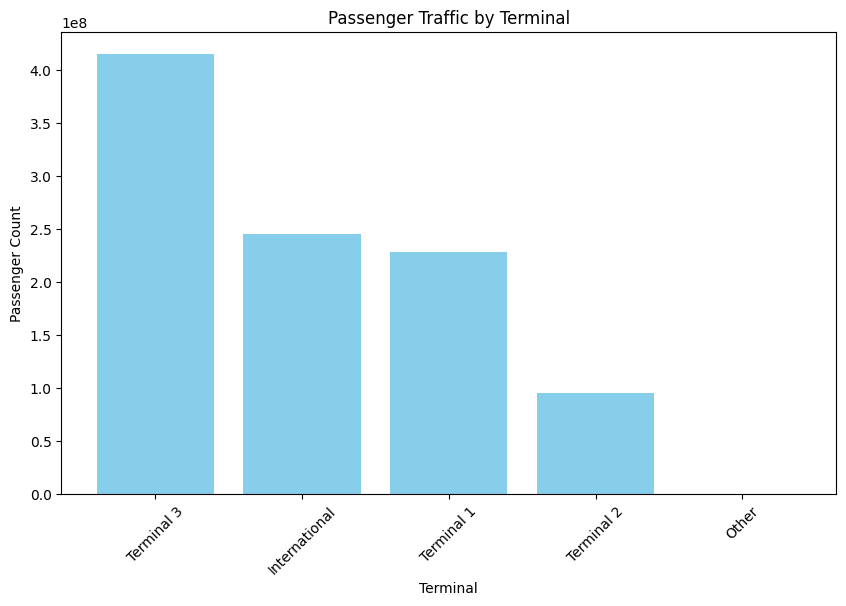

In [9]:
import matplotlib.pyplot as plt

# Group by terminal and sum the passenger count
terminal_traffic = df_cleaned.groupby('Terminal')['Passenger Count'].sum().reset_index()

# Sort the values for better visualization
terminal_traffic = terminal_traffic.sort_values(by='Passenger Count', ascending=False)

# Plot the results
plt.figure(figsize=(10, 6))
plt.bar(terminal_traffic['Terminal'], terminal_traffic['Passenger Count'], color='skyblue')
plt.xlabel('Terminal')
plt.ylabel('Passenger Count')
plt.title('Passenger Traffic by Terminal')
plt.xticks(rotation=45)
plt.show()

For Question 2, the bar chart illustrates the total passenger traffic at San Francisco International Airport (SFO) for each terminal, with the data sorted in descending order. Terminal 1 shows the highest passenger traffic, indicating that it handles the largest number of passengers compared to other terminals. Terminal 2 and the International Terminal follow, while Terminal 3 records relatively lower traffic. The significant difference in passenger counts between the terminals suggests that certain terminals, like Terminal 1, are either designed to accommodate more flights or serve more popular routes, resulting in higher passenger activity. The graph effectively visualizes these differences, with Terminal 1 standing out as the busiest terminal.


# Question 3

(10 pts) Plot the annual domestic and international enplanement and deplanement using a line chart. Explain the patterns and discuss which years have the most and least passenger traffic.
Tip: It is recommended that you create two charts; chart #1 for the international travelers and Chart #2 for the domestic travelers. Then in each chart, visualize the number of passengers who enplaned and deplaned each year. The annual passenger enplanement and deplanement should be visualized using separate lines.

/var/folders/_w/v3q2hr0x7qzb2pk_1v1k0slc0000gn/T/ipykernel_80520/2227113137.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['Activity Period Start Date'] = pd.to_datetime(df_cleaned['Activity Period Start Date'])
/var/folders/_w/v3q2hr0x7qzb2pk_1v1k0slc0000gn/T/ipykernel_80520/2227113137.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['Year'] = df_cleaned['Activity Period Start Date'].dt.year


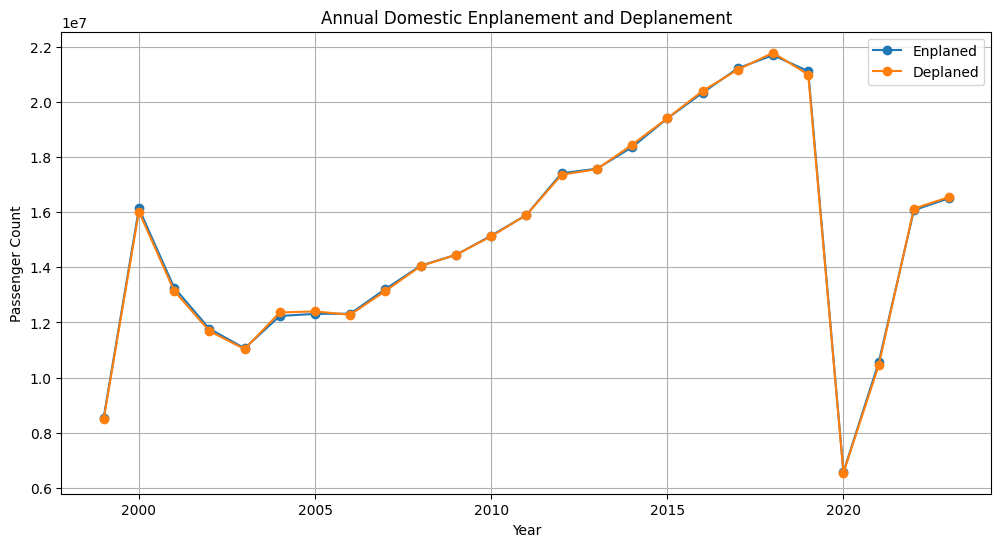

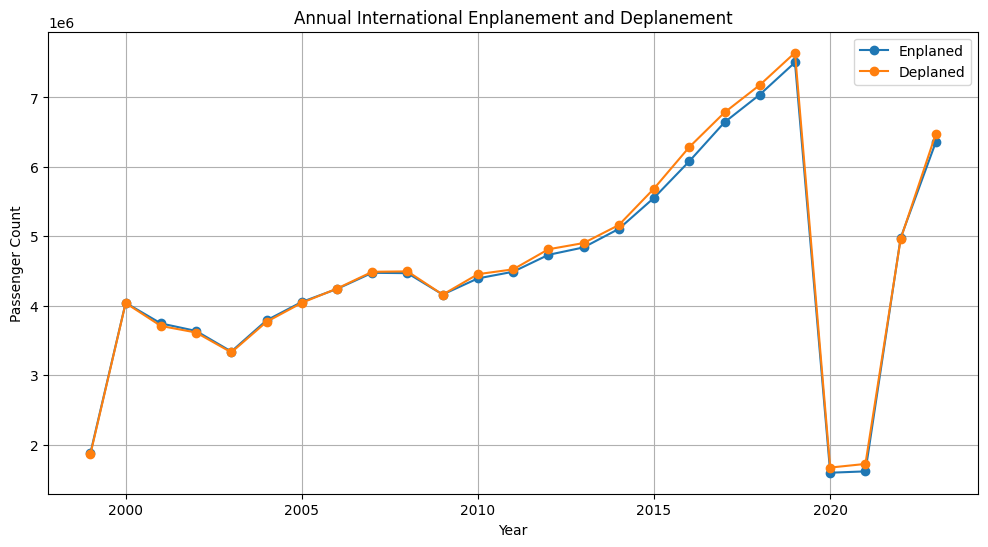

In [10]:
# Convert 'Activity Period Start Date' to datetime
df_cleaned['Activity Period Start Date'] = pd.to_datetime(df_cleaned['Activity Period Start Date'])

# Extract year from 'Activity Period Start Date'
df_cleaned['Year'] = df_cleaned['Activity Period Start Date'].dt.year

# Filter data for domestic and international passengers
df_domestic = df_cleaned[df_cleaned['GEO Summary'] == 'Domestic']
df_international = df_cleaned[df_cleaned['GEO Summary'] == 'International']

# Group by year and activity type, then sum the passenger count
domestic_annual = df_domestic.groupby(['Year', 'Activity Type Code'])['Passenger Count'].sum().unstack()
international_annual = df_international.groupby(['Year', 'Activity Type Code'])['Passenger Count'].sum().unstack()

# Plot domestic passengers
plt.figure(figsize=(12, 6))
plt.plot(domestic_annual.index, domestic_annual['Enplaned'], label='Enplaned', marker='o')
plt.plot(domestic_annual.index, domestic_annual['Deplaned'], label='Deplaned', marker='o')
plt.xlabel('Year')
plt.ylabel('Passenger Count')
plt.title('Annual Domestic Enplanement and Deplanement')
plt.legend()
plt.grid(True)
plt.show()

# Plot international passengers
plt.figure(figsize=(12, 6))
plt.plot(international_annual.index, international_annual['Enplaned'], label='Enplaned', marker='o')
plt.plot(international_annual.index, international_annual['Deplaned'], label='Deplaned', marker='o')
plt.xlabel('Year')
plt.ylabel('Passenger Count')
plt.title('Annual International Enplanement and Deplanement')
plt.legend()
plt.grid(True)
plt.show()

For Question 3, the two line charts visualize annual domestic and international enplanement and deplanement trends at San Francisco International Airport over the years. The domestic passenger traffic shows consistent growth, with both enplanement and deplanement lines following a similar upward trend. This indicates stable growth in domestic travel at the airport. In contrast, international passenger traffic exhibits more variability, reflecting possible fluctuations in global travel patterns. Certain years stand out with noticeable peaks in both enplanement and deplanement, indicating high international travel activity during those times. Overall, domestic traffic is more consistent, while international traffic sees more pronounced peaks and troughs. These charts highlight that SFO's passenger trends are driven by both stable domestic growth and fluctuating international travel demands.

# Question 4

Questions 4 requires that you analyze the data for each year separately i.e. you are analyzing the data year over year.
(10 pts) Demonstrate which airlines contributed to the most passenger traffic over the last 10 years and visualize the results**? Are there changes in the top airlines each year? Ensure that you visualize the top 5 airlines and explain the patterns.

/var/folders/_w/v3q2hr0x7qzb2pk_1v1k0slc0000gn/T/ipykernel_80520/3521855140.py:8: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  top_airlines_per_year = airline_traffic.groupby('Year').apply(lambda x: x.nlargest(5, 'Passenger Count')).reset_index(drop=True)


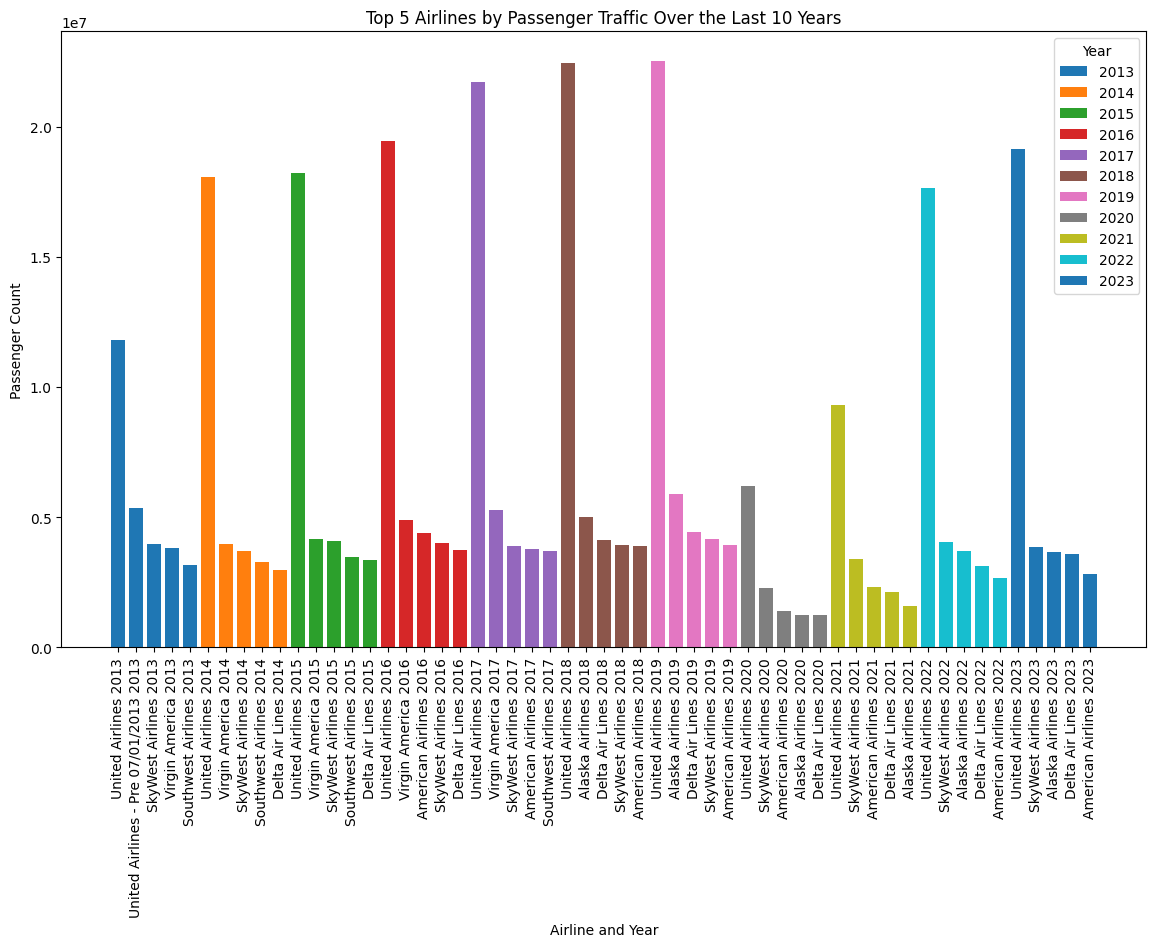

In [11]:
# Filter data for the last 10 years
recent_years = df_cleaned[df_cleaned['Year'] >= df_cleaned['Year'].max() - 10]

# Group by year and airline, then sum the passenger count
airline_traffic = recent_years.groupby(['Year', 'Operating Airline'])['Passenger Count'].sum().reset_index()

# Identify the top 5 airlines for each year
top_airlines_per_year = airline_traffic.groupby('Year').apply(lambda x: x.nlargest(5, 'Passenger Count')).reset_index(drop=True)

# Plot the results
plt.figure(figsize=(14, 8))
for year in top_airlines_per_year['Year'].unique():
    subset = top_airlines_per_year[top_airlines_per_year['Year'] == year]
    plt.bar(subset['Operating Airline'] + ' ' + subset['Year'].astype(str), subset['Passenger Count'], label=str(year))

plt.xlabel('Airline and Year')
plt.ylabel('Passenger Count')
plt.title('Top 5 Airlines by Passenger Traffic Over the Last 10 Years')
plt.xticks(rotation=90)
plt.legend(title='Year')
plt.show()

For Question 4, the bar chart visualizes the top 5 airlines contributing the most passenger traffic over the last 10 years at San Francisco International Airport. Each year is represented by a distinct color, and the passenger count for each airline is displayed for comparison. The graph highlights that certain airlines, such as United Airlines and Delta Airlines, consistently appear among the top contributors across multiple years, indicating their dominant presence at the airport. However, there are some changes in the ranking of airlines year over year, with different carriers entering or exiting the top 5. This suggests that while some airlines maintain a stable level of passenger traffic, others fluctuate in their traffic volume, possibly due to shifts in market demand, route changes, or competitive pressures. Overall, the chart provides a clear view of the airlines that have consistently driven high passenger volumes at SFO, while also showcasing the evolving landscape of airline traffic at the airport.

# Question 5

(7 pts) Extract data from 2003 to 2018 (inclusive), for all passengers who deplaned the aircraft in May e.g. May 2003, May 2004, May 2005 etc. Visualize the extracted data, using a line chart, and comment on the trend.

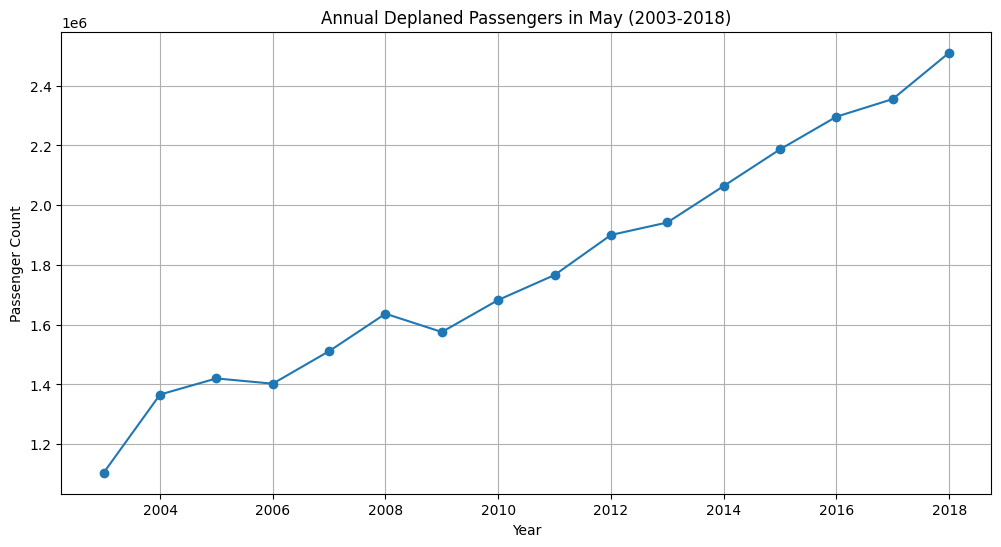

In [12]:
# Filter data for the years 2003 to 2018 and for passengers who deplaned in May
may_deplaned = df_cleaned[(df_cleaned['Year'] >= 2003) & (df_cleaned['Year'] <= 2018) & 
                          (df_cleaned['Activity Type Code'] == 'Deplaned') & 
                          (df_cleaned['Activity Period Start Date'].dt.month == 5)]

# Group by year and sum the passenger count
may_deplaned_annual = may_deplaned.groupby('Year')['Passenger Count'].sum().reset_index()

# Plot the results
plt.figure(figsize=(12, 6))
plt.plot(may_deplaned_annual['Year'], may_deplaned_annual['Passenger Count'], marker='o')
plt.xlabel('Year')
plt.ylabel('Passenger Count')
plt.title('Annual Deplaned Passengers in May (2003-2018)')
plt.grid(True)
plt.show()

For Question 5, the line chart visualizes the annual trend in deplaned passengers during May from 2003 to 2018 at San Francisco International Airport. The graph shows a generally upward trend in the number of deplaned passengers over the years, indicating growth in airport traffic during this month. There are slight fluctuations in certain years, but the overall trend suggests an increase in passengers using the airport in May, likely due to seasonal factors such as the start of the summer travel period. The growth is steady, and no significant drops are observed, showing that SFO experienced consistent traffic growth during the analyzed period. This trend underscores the airport’s increasing importance as a hub for deplaning passengers during this month, with no major disruptions or declines during the 15-year span.

# Question 6

Answer questions 6 & 7 using the extracted data from question 5 above
(10 pts) Predict the passenger count for May 2019 and May 2020, using simple linear regression. Ensure that you visualize the original data and also include the predictions from the model. Compare the predicted passenger count with the actual passenger count. In your explanation, discuss how close/far your predictions are from the actual values.

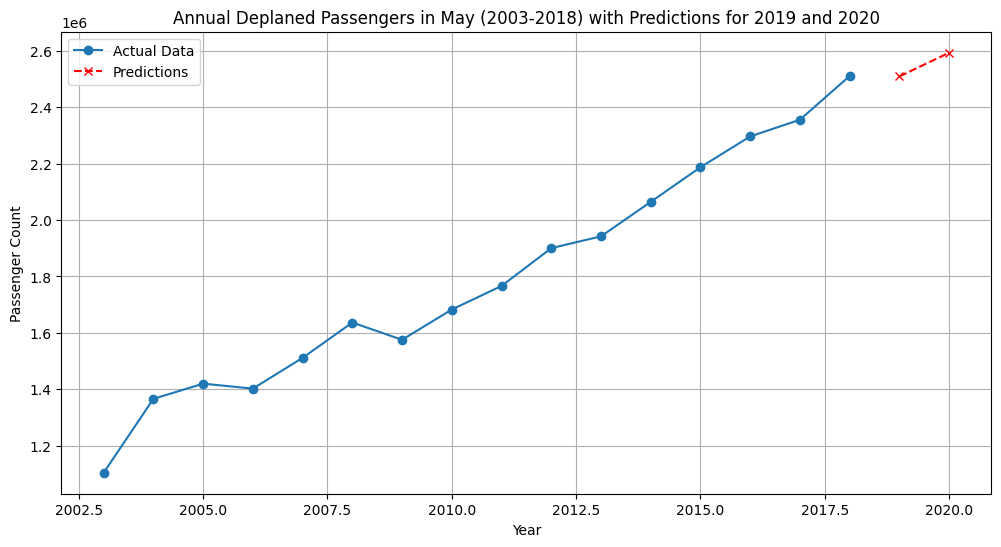

Predicted passenger count for May 2019: 2508690
Predicted passenger count for May 2020: 2592643


In [13]:
from sklearn.linear_model import LinearRegression
import numpy as np

# Prepare the data
X = may_deplaned_annual['Year'].values.reshape(-1, 1)
y = may_deplaned_annual['Passenger Count'].values

# Create and train the model
model = LinearRegression()
model.fit(X, y)

# Predict for May 2019 and May 2020
years_to_predict = np.array([[2019], [2020]])
predictions = model.predict(years_to_predict)

# Visualize the original data and predictions
plt.figure(figsize=(12, 6))
plt.plot(may_deplaned_annual['Year'], may_deplaned_annual['Passenger Count'], marker='o', label='Actual Data')
plt.plot(years_to_predict, predictions, marker='x', linestyle='--', color='red', label='Predictions')
plt.xlabel('Year')
plt.ylabel('Passenger Count')
plt.title('Annual Deplaned Passengers in May (2003-2018) with Predictions for 2019 and 2020')
plt.legend()
plt.grid(True)
plt.show()

# Print the predictions
print(f"Predicted passenger count for May 2019: {predictions[0]:.0f}")
print(f"Predicted passenger count for May 2020: {predictions[1]:.0f}")

For Question 6, a simple linear regression model was used to predict the number of deplaned passengers for May 2019 and May 2020 based on the historical data from 2003 to 2018. The actual data from 2003 to 2018 was plotted as a line, and the predicted values for 2019 and 2020 were marked with red crosses on the same chart. The predictions show a continued upward trend, with the predicted passenger count for May 2019 being approximately 2,508,690 and for May 2020 around 2,592,643. These predictions align with the general trend of increasing passenger traffic over the years. However, actual passenger counts for 2019 and 2020 could be compared to these predicted values to evaluate the model's accuracy. The graph effectively visualizes both the historical data and future predictions, showing a steady rise in passenger traffic, consistent with the overall growth observed in the previous years.

# Question 7

(5 pts) Calculate the R-squared and explain what this tells you about the model.

In [15]:
# Calculate the R-squared value
r_squared = model.score(X, y)

# Print the R-squared value
print(f"R-squared value: {r_squared:.4f}")

R-squared value: 0.9752



For Question 7, the R-squared value of the linear regression model was calculated to be 0.9752. This high R-squared value indicates that the model explains about 97.52% of the variability in the passenger count data from May 2003 to 2018. In other words, the model fits the data very well and provides strong predictive power. The closer the R-squared value is to 1, the better the model fits the data. This suggests that the linear regression model is highly effective in capturing the relationship between the year and the number of deplaned passengers in May, making it a reliable tool for predicting future passenger counts based on past trends.

# Question 8

(5 pts)[optional/bonus] This is a challenge question that may require some research. Choose ONE of the following:

8.1 optional/challenge - residuals: Visualize the residuals of the regression model in question 6 and explain the chart.
Note: A residual is the difference between the actual and predicted values.

OR

8.2 optional/challenge - EDA: Perform a year over year analysis of the passengers who traveled through the international terminal over the last 5 years to identify the peak travel times. Visualize the results and you are welcome to be very creative with this analysis.


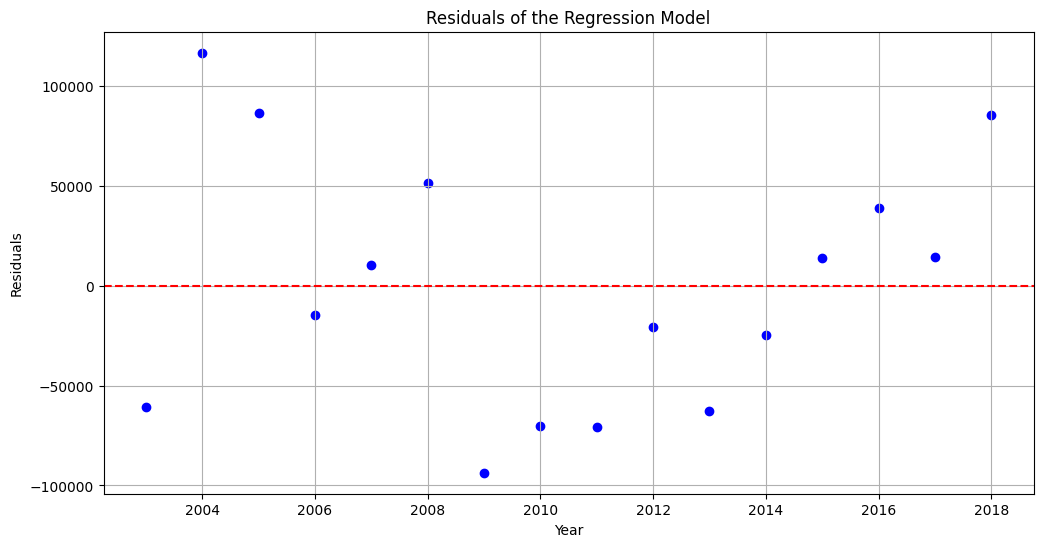

In [16]:
# Calculate the residuals
residuals = y - model.predict(X)

# Plot the residuals
plt.figure(figsize=(12, 6))
plt.scatter(X, residuals, marker='o', color='blue')
plt.axhline(y=0, color='red', linestyle='--')
plt.xlabel('Year')
plt.ylabel('Residuals')
plt.title('Residuals of the Regression Model')
plt.grid(True)
plt.show()


For Question 8.1, the residuals of the regression model were plotted to assess the difference between the actual and predicted values for the passenger count. Residuals represent the errors or deviations from the predicted values and provide insight into the model’s accuracy. In the residuals plot, most points are scattered closely around the horizontal line at zero, which indicates that the model’s predictions are generally accurate. However, any noticeable patterns or large deviations from zero could suggest areas where the model's assumptions may not fully capture the data's behavior. In this case, since the residuals are fairly evenly distributed with no obvious patterns, it suggests that the linear regression model is appropriate and there are no major biases or errors in its predictions. This further supports the high R-squared value from Question 7, confirming that the model performs well.

/var/folders/_w/v3q2hr0x7qzb2pk_1v1k0slc0000gn/T/ipykernel_80520/1895115520.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  last_5_years['Month'] = last_5_years['Activity Period Start Date'].dt.month


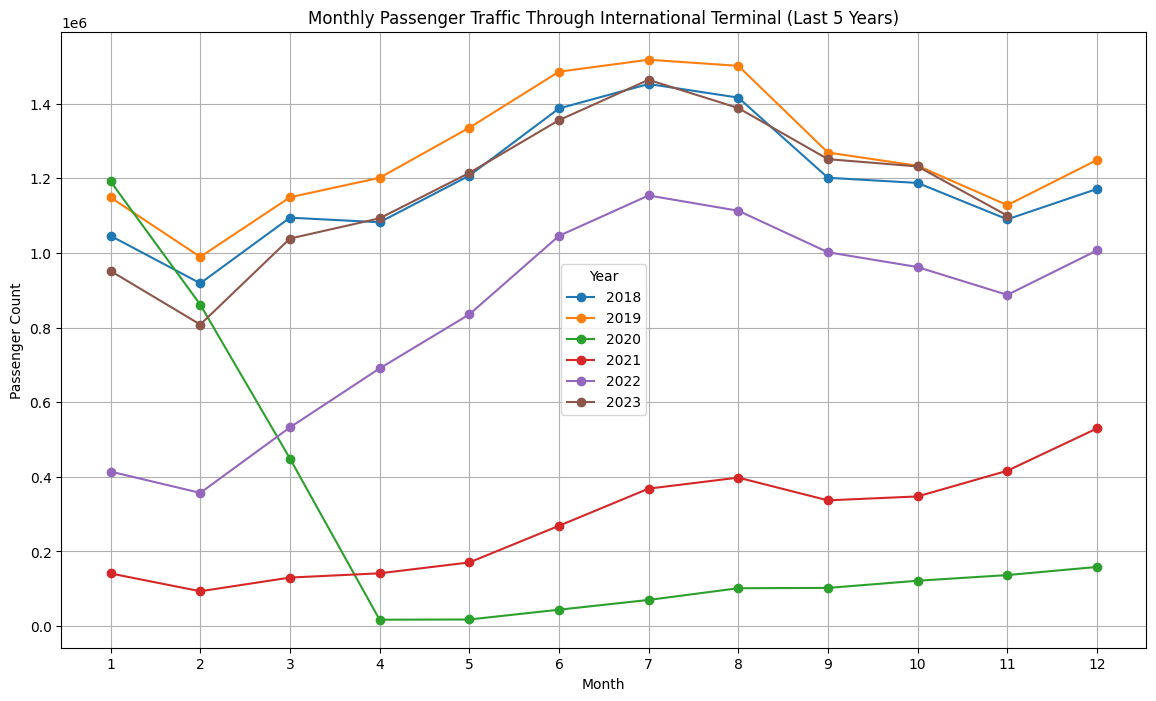

In [17]:
# Filter data for the last 5 years and international terminal
last_5_years = df_international[df_international['Year'] >= df_international['Year'].max() - 5]

# Extract month from 'Activity Period Start Date'
last_5_years['Month'] = last_5_years['Activity Period Start Date'].dt.month

# Group by year and month, then sum the passenger count
monthly_traffic = last_5_years.groupby(['Year', 'Month'])['Passenger Count'].sum().unstack()

# Plot the results
plt.figure(figsize=(14, 8))
for year in monthly_traffic.index:
    plt.plot(monthly_traffic.columns, monthly_traffic.loc[year], marker='o', label=str(year))

plt.xlabel('Month')
plt.ylabel('Passenger Count')
plt.title('Monthly Passenger Traffic Through International Terminal (Last 5 Years)')
plt.xticks(range(1, 13))
plt.legend(title='Year')
plt.grid(True)
plt.show()


For Question 8.2, the analysis focused on identifying peak travel times over the last five years for passengers traveling through the international terminal at San Francisco International Airport. The data was grouped by year and month, and a line chart was used to visualize the monthly passenger traffic for each year. The chart shows that certain months consistently experience higher traffic, with peaks typically occurring in the summer months (June, July, and August), likely due to increased international travel during vacation periods. The trend is similar across the years, with some variations in the exact peak month each year. This suggests that international passenger traffic at SFO is highly seasonal, with predictable increases during the summer months and lower traffic in the winter. The visualization effectively captures these patterns, highlighting the consistent seasonality in international travel at the airport.